# Classifier Selection

## Import Libraries

In [1]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras import backend as K
from keras.utils import Sequence, to_categorical
from imageio import imread

import matplotlib.pyplot as plt
import numpy as np
import json
import math
import sys
import os

%matplotlib inline

Using TensorFlow backend.


## Load the Classification Model Results

In [3]:
results = json.load(open('../results.json', 'r'))

## Model names

In [4]:
models = {'clf_normal_full': [], 'clf_normal_xfull': [], 'clf_normal_lfull': [], 'clf_perplane': []}

## Aggregating Results

In [5]:
for key in models.keys():
    for result in results.keys():
        if result.startswith(key):
            models[key].append(results[result][1])

## Plot the Results

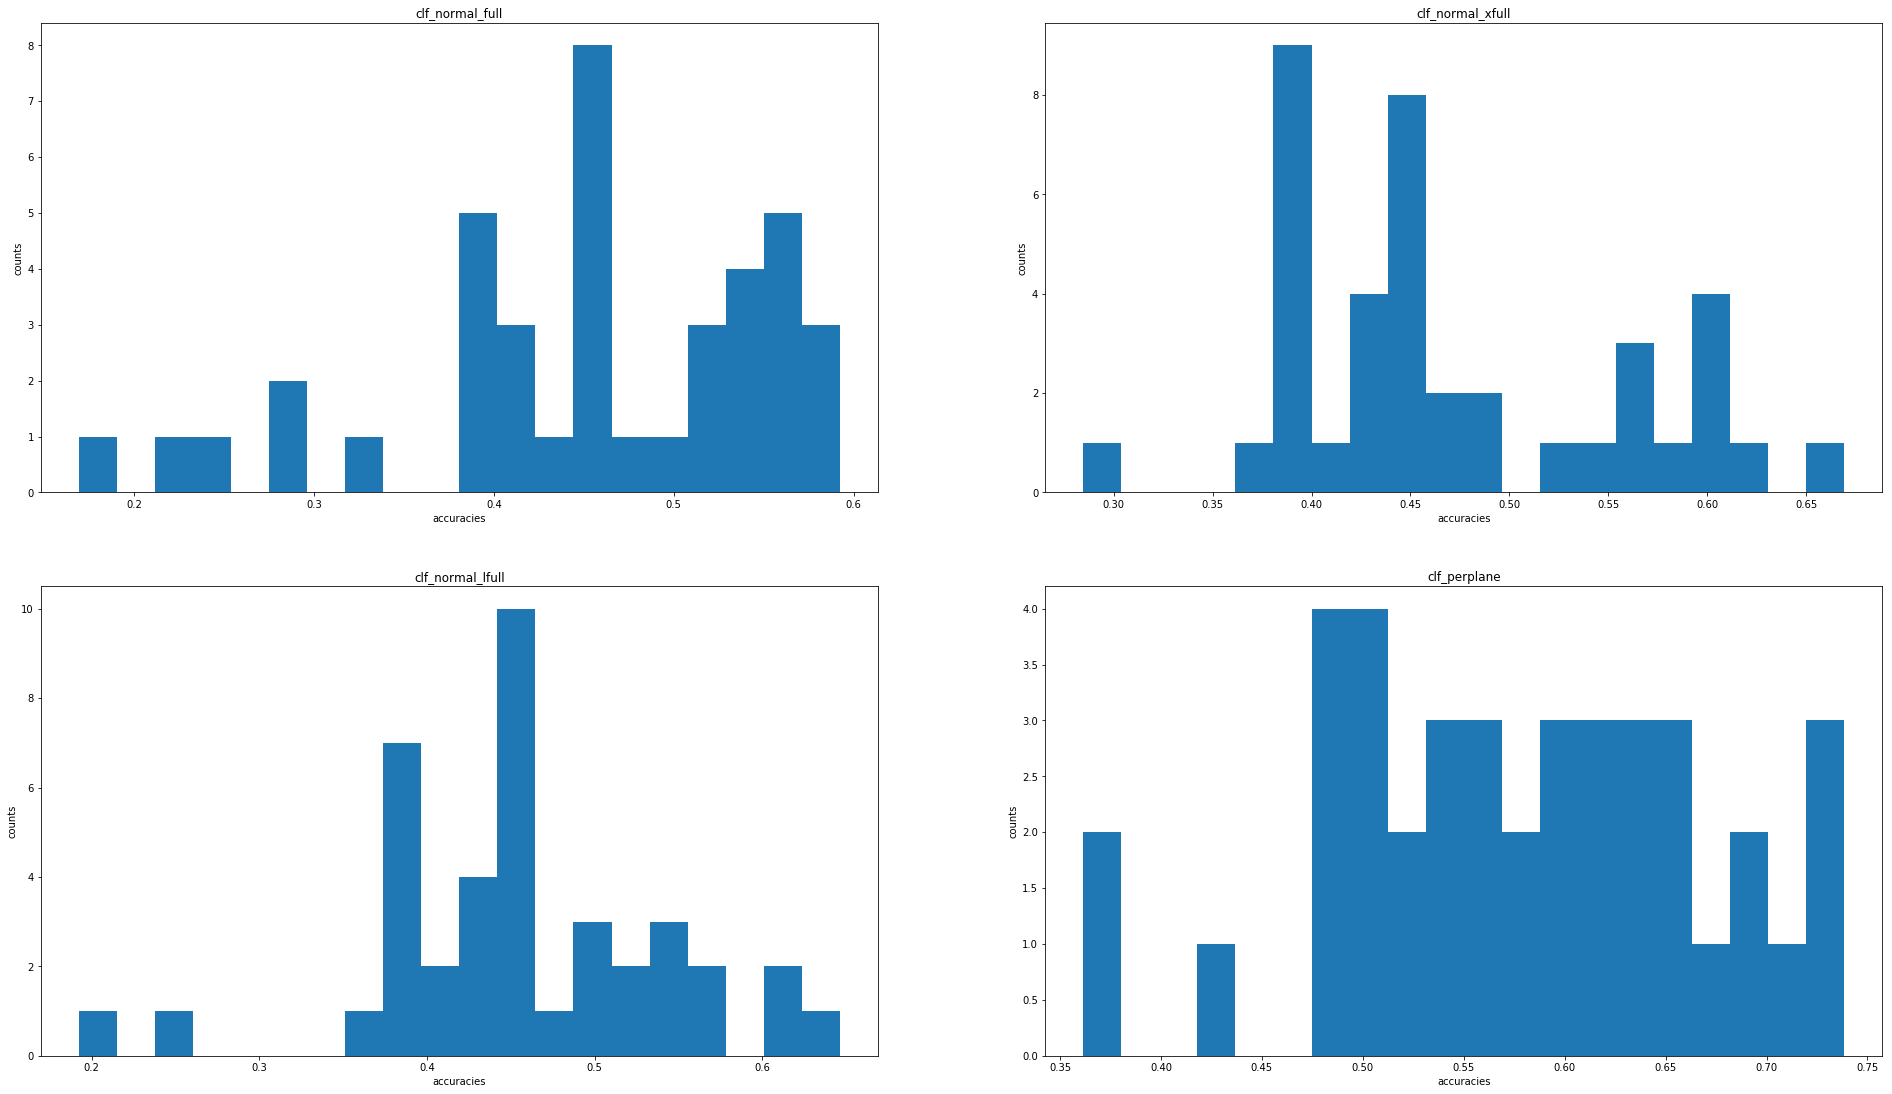

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(33,19))
axes[0,0].set_title('clf_normal_full')
axes[0,0].set_xlabel('accuracies')
axes[0,0].set_ylabel('counts')
axes[0,0].hist(models['clf_normal_full'], bins=20)
axes[0,1].set_title('clf_normal_xfull')
axes[0,1].set_xlabel('accuracies')
axes[0,1].set_ylabel('counts')
axes[0,1].hist(models['clf_normal_xfull'], bins=20)
axes[1,0].set_title('clf_normal_lfull')
axes[1,0].set_xlabel('accuracies')
axes[1,0].set_ylabel('counts')
axes[1,0].hist(models['clf_normal_lfull'], bins=20)
axes[1,1].set_title('clf_perplane')
axes[1,1].set_xlabel('accuracies')
axes[1,1].set_ylabel('counts')
axes[1,1].hist(models['clf_perplane'], bins=20)
plt.show()

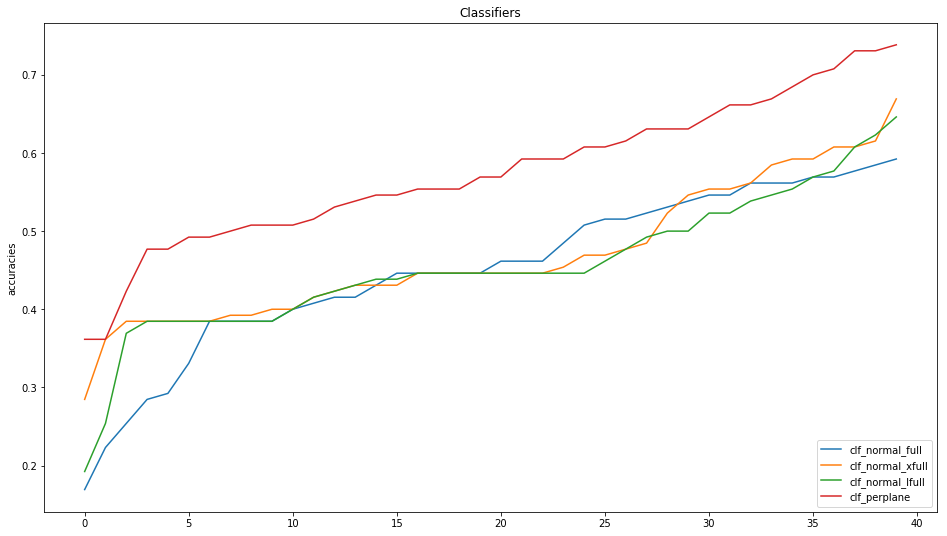

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,9))
axes.set_title('Classifiers')
axes.set_ylabel('accuracies')
axes.plot(sorted(models['clf_normal_full']), label='clf_normal_full')
axes.plot(sorted(models['clf_normal_xfull']), label='clf_normal_xfull')
axes.plot(sorted(models['clf_normal_lfull']), label='clf_normal_lfull')
axes.plot(sorted(models['clf_perplane']), label='clf_perplane')
axes.legend(loc='lower right')
plt.show()

## Testing the Classifier

In [47]:
model = load_model('../models/clf_normal_xfull_192_0.2.h5')

In [68]:
images1 = ['../classifier_data/test/DIPG-patient_0-20171208-IM-0006-0007',
         '../classifier_data/test/DIPG-patient_0-20171208-IM-0006-0008',
         '../classifier_data/test/DIPG-patient_0-20171208-IM-0006-0009',
         '../classifier_data/test/DIPG-patient_0-20171208-IM-0006-0010',
         '../classifier_data/test/DIPG-patient_0-20171208-IM-0006-0011',
         '../classifier_data/test/DIPG-patient_0-20171208-IM-0006-0012',
         '../classifier_data/test/DIPG-patient_0-20171208-IM-0006-0013',
         '../classifier_data/test/DIPG-patient_0-20171208-IM-0006-0014',
         '../classifier_data/test/DIPG-patient_0-20171208-IM-0006-0015',
         ]

In [76]:
images2 = ['../classifier_data/test/MB-StanMB0075-0-IM-0443-0006',
         '../classifier_data/test/MB-StanMB0075-0-IM-0443-0007',
         '../classifier_data/test/MB-StanMB0075-0-IM-0443-0008',
         '../classifier_data/test/MB-StanMB0075-0-IM-0443-0009',
         '../classifier_data/test/MB-StanMB0075-0-IM-0443-0010',
         '../classifier_data/test/MB-StanMB0075-0-IM-0443-0011',
         '../classifier_data/test/MB-StanMB0075-0-IM-0443-0012',
         ]

In [83]:
images3 = ['../classifier_data/test/EP-StanEP0003-0-IM-0264-0005',
         '../classifier_data/test/EP-StanEP0003-0-IM-0264-0006',
         '../classifier_data/test/EP-StanEP0003-0-IM-0264-0007',
         '../classifier_data/test/EP-StanEP0003-0-IM-0264-0008',
         '../classifier_data/test/EP-StanEP0003-0-IM-0264-0009',
         '../classifier_data/test/EP-StanEP0003-0-IM-0264-0010',
         '../classifier_data/test/EP-StanEP0003-0-IM-0264-0011',
         ]

In [89]:
img_data = np.zeros((9, 256, 256, 3))
for i, image in enumerate(images1):
    img_data[i] = np.expand_dims(imread(image + '.png'), axis=0)

In [90]:
classes = model.predict(img_data, batch_size=13, verbose=1)

9/9 [==============================] - 3s 325ms/step


In [91]:
clf = np.argmax(classes, axis=-1)

In [92]:
imapping = {0: 'DIPG', 1: 'MB', 2: 'EP'}

In [93]:
for x in clf:
    print(imapping[x])

DIPG
DIPG
DIPG
DIPG
DIPG
DIPG
DIPG
DIPG
DIPG
